<a href="https://colab.research.google.com/github/jhagopal/MachineLearning/blob/main/knn_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_digits

In [3]:
digits = load_digits()

In [5]:
df = pd.DataFrame(digits.data, columns = digits.feature_names)

In [6]:
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [7]:
df['target'] = digits.target

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.3)

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
knn = KNeighborsClassifier(n_neighbors = 3)

In [35]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [36]:
knn.score(X_test, y_test)

0.9851851851851852

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
model_params = {
    'knn_classifier' : {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors' : [1,2,3,4,5,6,7,8,9]
        }
    }
}

In [30]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(digits.data, digits.target)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,knn_classifier,0.967171,{'n_neighbors': 2}


In [37]:
from sklearn.metrics import confusion_matrix

In [39]:
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

Text(58.222222222222214, 0.5, 'Truth')

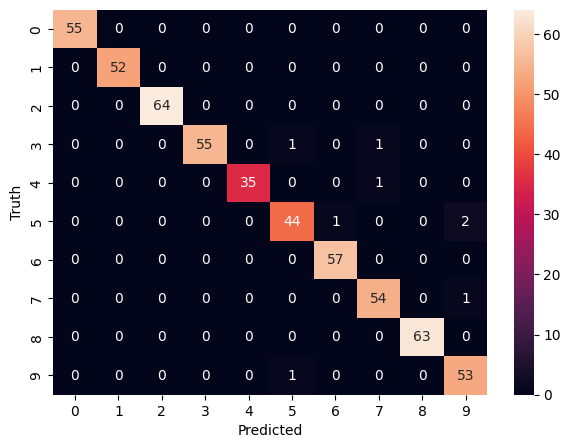

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [41]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        52
           2       1.00      1.00      1.00        64
           3       1.00      0.96      0.98        57
           4       1.00      0.97      0.99        36
           5       0.96      0.94      0.95        47
           6       0.98      1.00      0.99        57
           7       0.96      0.98      0.97        55
           8       1.00      1.00      1.00        63
           9       0.95      0.98      0.96        54

    accuracy                           0.99       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.99      0.99      0.99       540

